## 目录
1. 查看Pipeline支持的任务类型
2. Pipeline的创建与使用方式
    
        2.1 根据任务类型直接创建Pipeline，默认都是英文的模型

        2.2 指定任务类型，再指定模型，创建基于指定模型的Pipeline

        2.3 预先加载模型，再创建Pipeline

        2.4 使用GPU进行推理加速
    
3. 确定Pipeline的参数
4. 其他Pipeline示例
5. Pipeline的背后实现

## 1. 查看Pipeline支持的任务类型

In [1]:
from transformers.pipelines import SUPPORTED_TASKS

In [3]:
SUPPORTED_TASKS.items()

dict_items([('audio-classification', {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}), ('automatic-speech-recognition', {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}), ('text-to-audio', {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'defau

In [4]:
for k, v in SUPPORTED_TASKS.items():
    print(k, v)

audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}
text-to-audio {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'default': {'model': {'pt': ('suno

In [2]:
for k, v in SUPPORTED_TASKS.items():
    print(k, v["type"])

audio-classification audio
automatic-speech-recognition multimodal
text-to-audio text
feature-extraction multimodal
text-classification text
token-classification text
question-answering text
table-question-answering text
visual-question-answering multimodal
document-question-answering multimodal
fill-mask text
summarization text
translation text
text2text-generation text
text-generation text
zero-shot-classification text
zero-shot-image-classification multimodal
zero-shot-audio-classification multimodal
conversational text
image-classification image
image-segmentation multimodal
image-to-text multimodal
object-detection multimodal
zero-shot-object-detection multimodal
depth-estimation image
video-classification video
mask-generation multimodal
image-to-image image


## 2. Pipeline的创建与使用方式

In [5]:
from transformers import *

### 2.1 根据任务类型直接创建Pipeline，默认都是英文的模型

In [7]:
pipe = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
config.json: 100%|██████████| 629/629 [00:00<00:00, 210kB/s]
d:\work_tools\Anaconda\program\envs\my_transformers\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\DueFireTop-NUC\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Develop

In [8]:
pipe("very good")

[{'label': 'POSITIVE', 'score': 0.9998520612716675}]

### 2.2 指定任务类型，再指定模型，创建基于指定模型的Pipeline

In [9]:
# https://huggingface.co/models
pipe = pipeline("text-classification", model = "uer/roberta-base-finetuned-chinanews-chinese")

config.json: 100%|██████████| 880/880 [00:00<00:00, 126kB/s]
loading configuration file config.json from cache at C:\Users\DueFireTop-NUC/.cache\huggingface\hub\models--uer--roberta-base-finetuned-chinanews-chinese\snapshots\638100ab2773a8c3d0afceb9387eb88fe707fbe1\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-chinanews-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "mainland China politics",
    "1": "Hong Kong - Macau politics",
    "2": "International news",
    "3": "financial news",
    "4": "culture",
    "5": "entertainment",
    "6": "sports"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Hong Kong - Macau politics": 1,
    "International news": 2,
    "culture": 4,
    "entert

In [11]:
pipe("这本书真的很不错")

[{'label': 'culture', 'score': 0.8453322649002075}]

In [12]:
pipe("这场比赛太烂了")

[{'label': 'sports', 'score': 0.9895142316818237}]

### 2.3 预先加载模型，再创建Pipeline

In [31]:
# 这种方式，必须同时指定model和tokenizer
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-chinanews-chinese")
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-chinanews-chinese")
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

loading configuration file config.json from cache at C:\Users\DueFireTop-NUC/.cache\huggingface\hub\models--uer--roberta-base-finetuned-chinanews-chinese\snapshots\638100ab2773a8c3d0afceb9387eb88fe707fbe1\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-chinanews-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "mainland China politics",
    "1": "Hong Kong - Macau politics",
    "2": "International news",
    "3": "financial news",
    "4": "culture",
    "5": "entertainment",
    "6": "sports"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Hong Kong - Macau politics": 1,
    "International news": 2,
    "culture": 4,
    "entertainment": 5,
    "financial news": 3,
    "mainland China pol

In [32]:
pipe("这场比赛太烂了")

[{'label': 'sports', 'score': 0.9895142316818237}]

### 2.4 使用GPU进行推理加速

In [33]:
pipe.model.device

device(type='cpu')

In [34]:
pipe = pipeline("text-classification", model = "uer/roberta-base-finetuned-chinanews-chinese", device=0)

loading configuration file config.json from cache at C:\Users\DueFireTop-NUC/.cache\huggingface\hub\models--uer--roberta-base-finetuned-chinanews-chinese\snapshots\638100ab2773a8c3d0afceb9387eb88fe707fbe1\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-chinanews-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "mainland China politics",
    "1": "Hong Kong - Macau politics",
    "2": "International news",
    "3": "financial news",
    "4": "culture",
    "5": "entertainment",
    "6": "sports"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Hong Kong - Macau politics": 1,
    "International news": 2,
    "culture": 4,
    "entertainment": 5,
    "financial news": 3,
    "mainland China pol

In [35]:
pipe.model.device

device(type='cuda', index=0)

## 3. 确定Pipeline的参数

In [37]:
qa_pipe = pipeline("question-answering", model="uer/roberta-base-chinese-extractive-qa", device=0)

loading configuration file config.json from cache at C:\Users\DueFireTop-NUC/.cache\huggingface\hub\models--uer--roberta-base-chinese-extractive-qa\snapshots\9b02143727b9c4655d18b43a69fc39d5eb3ddd53\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-chinese-extractive-qa",
  "architectures": [
    "BertForQuestionAnswering"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

loading configuration file config.json from cache at C:\Users\DueFireTop-NUC/.cache\huggingface\hu

In [38]:
qa_pipe

In [ ]:
# 这个代码块不要执行
# 按住Ctrl进入源码,找到 __call__ 方法
QuestionAnsweringPipeline

In [41]:
qa_pipe(question="中国的首都在哪里", context = "中国的首都是北京")

{'score': 0.6626102924346924, 'start': 6, 'end': 8, 'answer': '北京'}

In [40]:
qa_pipe(question="中国的首都在哪里", context = "中国的首都是北京", max_answer_len = 1)

{'score': 0.0031947516836225986, 'start': 6, 'end': 7, 'answer': '北'}

## 4. 其他Pipeline示例

In [63]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task = "zero-shot-object-detection")

config.json: 100%|██████████| 4.42k/4.42k [00:00<00:00, 1.48MB/s]
loading configuration file config.json from cache at C:\Users\DueFireTop-NUC/.cache\huggingface\hub\models--google--owlvit-base-patch32\snapshots\8ca8ee912aa922a57e6a89144189080ebc8e852e\config.json
text_config is None. Initializing the OwlViTTextConfig with default values.
vision_config is None. initializing the OwlViTVisionConfig with default values.
Model config OwlViTConfig {
  "_name_or_path": "google/owlvit-base-patch32",
  "architectures": [
    "OwlViTForObjectDetection"
  ],
  "initializer_factor": 1.0,
  "logit_scale_init_value": 2.6592,
  "model_type": "owlvit",
  "projection_dim": 512,
  "text_config": {
    "bos_token_id": 0,
    "dropout": 0.0,
    "eos_token_id": 2,
    "max_length": 16,
    "model_type": "owlvit_text_model",
    "pad_token_id": 1
  },
  "text_config_dict": null,
  "torch_dtype": "float32",
  "transformers_version": "4.35.2",
  "vision_config": {
    "dropout": 0.0,
    "model_type": "owlv

In [66]:
detector

In [ ]:
ZeroShotObjectDetectionPipeline 

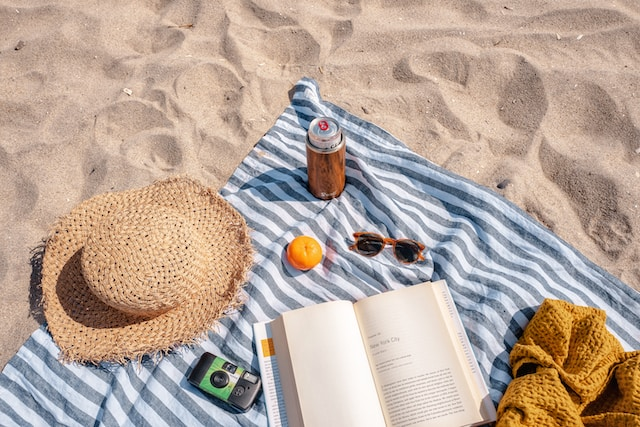

In [64]:
import requests
from PIL import Image

url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"
im = Image.open(requests.get(url, stream=True).raw)

im

In [65]:
predictions = detector(
    im,
    candidate_labels = ["hat", "sunglasses"]
    )

predictions

[{'score': 0.22562044858932495,
  'label': 'sunglasses',
  'box': {'xmin': 349, 'ymin': 228, 'xmax': 429, 'ymax': 265}},
 {'score': 0.10808214545249939,
  'label': 'hat',
  'box': {'xmin': 38, 'ymin': 172, 'xmax': 260, 'ymax': 363}}]

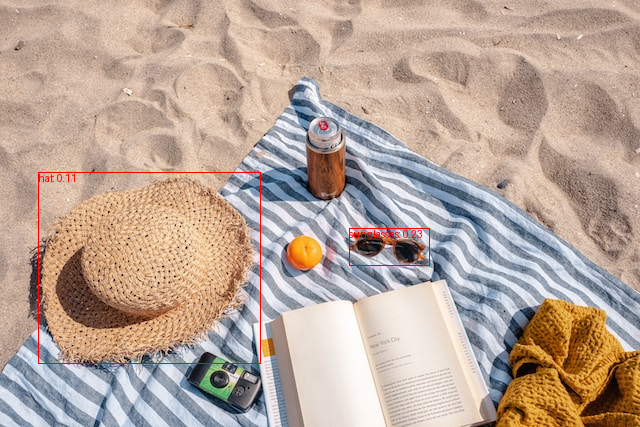

In [68]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score, 2)}", fill="red")

im

## 5. Pipeline的背后实现
- Step1 初始化Tokenizer
- Step2 初始化Model
- Step3 数据预处理
- Step4 模型预测
- Step5 结果后处理

In [69]:
from transformers import *
import torch

In [71]:
tokenizer = AutoTokenizer.from_pretrained("liam168/c2-roberta-base-finetuned-dianping-chinese")
model = AutoModelForSequenceClassification.from_pretrained("liam168/c2-roberta-base-finetuned-dianping-chinese")

tokenizer_config.json: 100%|██████████| 377/377 [00:00<00:00, 189kB/s]
vocab.txt: 100%|██████████| 110k/110k [00:00<00:00, 587kB/s]
tokenizer.json: 100%|██████████| 269k/269k [00:00<00:00, 1.68MB/s]
special_tokens_map.json: 100%|██████████| 112/112 [00:00<00:00, 37.4kB/s]
loading file vocab.txt from cache at C:\Users\DueFireTop-NUC/.cache\huggingface\hub\models--liam168--c2-roberta-base-finetuned-dianping-chinese\snapshots\952591d4ffb6df7b674eba74c4e2bb5dc9cb3128\vocab.txt
loading file tokenizer.json from cache at C:\Users\DueFireTop-NUC/.cache\huggingface\hub\models--liam168--c2-roberta-base-finetuned-dianping-chinese\snapshots\952591d4ffb6df7b674eba74c4e2bb5dc9cb3128\tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at C:\Users\DueFireTop-NUC/.cache\huggingface\hub\models--liam168--c2-roberta-base-finetuned-dianping-chinese\snapshots\952591d4ffb6df7b674eba74c4e2bb5dc9cb3128\special_tokens_map.json
loading file tokenizer_c

In [72]:
input_text = "我觉得不太行"

# 对数据进行tokenizer预处理
inputs = tokenizer(input_text, return_tensors="pt")
inputs

{'input_ids': tensor([[ 101, 2769, 6230, 2533,  679, 1922, 6121,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [77]:
res = model(**inputs)
res

SequenceClassifierOutput(loss=None, logits=tensor([[ 2.5903, -2.5530]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [78]:
logits = res.logits
logits = torch.softmax(logits, dim=-1)
logits

tensor([[0.9942, 0.0058]], grad_fn=<SoftmaxBackward0>)

In [79]:
pred = torch.argmax(logits).item()
pred

0

In [80]:
model.config.id2label

{0: 'negative', 1: 'positive'}

In [81]:
result = model.config.id2label.get(pred)
result

'negative'